## Importing Liabraries

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading Data

In [10]:
data  = pd.read_csv('market_data.csv')

In [8]:
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [11]:
data.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


<h3><b><font color = 'red'>Plotting Data

Text(0, 0.5, 'loyalty')

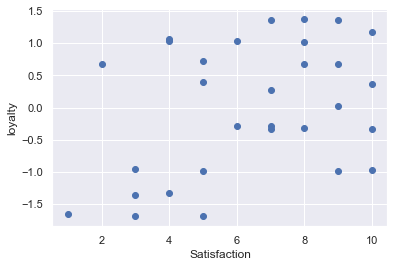

In [12]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('loyalty')

<font color = ' blue' > To make data distribution similar we will scale the data

## Preparing Input Data

In [14]:
from sklearn import preprocessing

In [16]:
##making a copy of data -> data_scaled
data_scaled = data.copy()
data_scaled = preprocessing.scale(data)
data_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

<font color = "red"> after Scaling data we can finally plot the elbow graph and we can select the no. of clusters

# Elbow Method

In [17]:
from sklearn.cluster import KMeans

In [19]:
w=[]
# blank list for storing WCSS (within cluster sum of square)

for i in range(1,8):
    kmeans = KMeans(n_clusters= i , random_state= 0)
    kmeans.fit(data_scaled)
    w.append(kmeans.inertia_)
    # interia will calculate the sum of squared distances for each cluster

In [20]:
w

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.569489487091783,
 5.326631124753926]

<font color = "red"> We have the data now we will plot the elbow graph

Text(0, 0.5, 'WCSS')

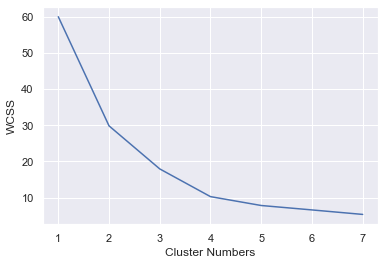

In [23]:
plt.plot(range(1,8), w)
plt.xlabel("Cluster Numbers")
plt.ylabel ("WCSS")

<font color = "blue" > here we can see after 4 graph is decreasing learly so we will use k=4 means clusser =4

# <font color = "green"> K-Means_Cluster

## Traning Model

In [25]:
kmean_cluster = KMeans(4)
kmean_cluster.fit(data_scaled)

KMeans(n_clusters=4)

### Inserting Labels to dataset

In [30]:
cluster_data = data.copy()
cluster_data['cluster_pred'] = kmean_cluster.fit_predict(data_scaled)

cluster_data.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,2


### Cluster Labels

In [31]:
kmean_cluster.labels_

array([1, 3, 1, 3, 2, 1, 3, 3, 0, 0, 3, 2, 1, 2, 3, 0, 0, 0, 3, 0, 0, 1,
       2, 1, 2, 3, 0, 3, 1, 2])

## Visualization

Text(0, 0.5, 'loyalty')

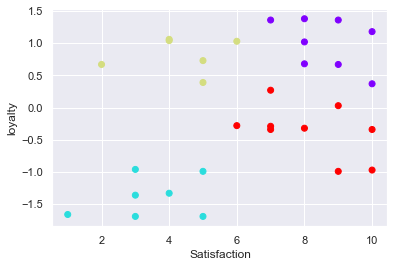

In [37]:
plt.scatter(data['Satisfaction'],data['Loyalty'] , c = cluster_data['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('loyalty')